# Facial Emotion Detection with Convolutional Neural Network

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). (kaggle)

# Import necessary modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import sys, os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

In [2]:
# upload file 'icml_face_data.csv' to driver and mount driver. Then paste file location here
path = '/content/drive/My Drive/Colab Notebooks/icml_face_data.csv'
data = pd.read_csv(path)

In [3]:
# first 5 rows 
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
# last 5 rows
data.tail()

,emotion,Usage,pixels
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35886,2,PrivateTest,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...


In [5]:
# shape (35887, 3)
data.shape

(35887, 3)

In [6]:
# all values
# emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [7]:
# collums
data.columns

Index(['emotion', ' Usage', ' pixels'], dtype='object')

In [8]:
width, height = 48, 48 # repesent for h and w of image
X = [] # a list
datapoints = data[' pixels'].tolist() #pandas.core.series.Series to list (list contain Str).
# 'datapoints': list of each images present as pixel. List of Str

for xseq in datapoints: # for Str in list. 'Str': contain series of pixel(str)
    xx = [int(xp) for xp in xseq.split(' ')] # split with space return. xx is a list
    xx = np.asarray(xx).reshape(width, height) # xx now is numpy.ndarray. xx.shape() = (48, 48)
    X.append(xx.astype('float32'))

X = np.asarray(X) # convert a list of array to type numpy.ndarray.
X = np.expand_dims(X, -1) #the number of dimensions increased. X shape now is (35887, 48, 48, 1)

#getting labels for training
y = pd.get_dummies(data['emotion']).to_numpy() # convert to to binary class matrix ex:(0,0,0,0,0,0,1). Alternative is "tf.keras.utils.to_categorical"

In [9]:
print ("number of examples = " + str(X.shape[0]))
print ("X shape: " + str(X.shape))
print ("Y shape: " + str(y.shape))

number of examples = 35887
X shape: (35887, 48, 48, 1)
Y shape: (35887, 7)


In [10]:
data[' Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name:  Usage, dtype: int64

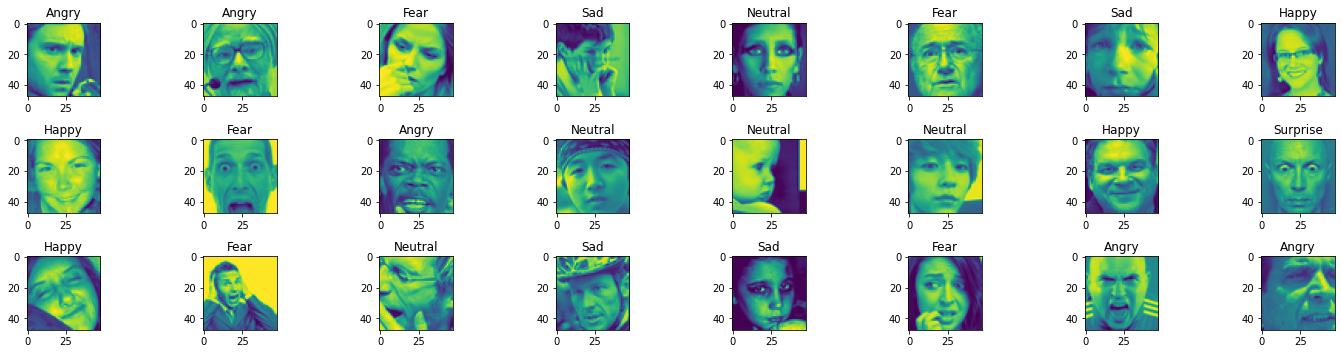

In [11]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
classes=np.array(emotion_labels)

nrows, ncols = 3, 8  # array of sub-plots
figsize = [20, 5]     # figure size, inches

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

for i, axi in enumerate(ax.flat):
    img = np.mat(X[i]).reshape(height, width) 
    axi.imshow(img)

    # get indices of row/column
    rowid = i // ncols
    colid = i % ncols
    axi.set_title(emotion_labels[data.emotion[i]])

plt.tight_layout(True)
plt.show()



In [12]:
num_features = 64

# number of possible label values
num_labels = 7

batch_size = 64
epochs = 100
width, height = 48, 48

# Compute the arithmetic mean.
# Returns the average of the array elements.
# The average is taken over the flattened array by default, otherwise over the specified axis.
X -= np.mean(X, axis=0)

# Compute the standard deviation.
# Returns the standard deviation, a measure of the spread of a distribution, of the array elements.
X /= np.std(X, axis=0)

In [13]:
#splitting into training, validation and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [14]:
print ("number of training examples = " + str(X_train.shape[0]))
#print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))
print ("X_valid shape: " + str(X_valid.shape))
print ("y_valid shape: " + str(y_valid.shape))

number of training examples = 29068
X_train shape: (29068, 48, 48, 1)
y_train shape: (29068, 7)
X_test shape: (3589, 48, 48, 1)
y_test shape: (3589, 7)
X_valid shape: (3230, 48, 48, 1)
y_valid shape: (3230, 7)


In [15]:
X_test[1].reshape(48,48)

array([[-0.72776514, -0.6660685 , -0.7523273 , ..., -0.76583207,
        -0.7897384 , -0.8268094 ],
       [-0.81650287, -0.59249836, -0.80623204, ..., -0.7704029 ,
        -0.7820999 , -0.8185572 ],
       [-0.756721  , -0.6310055 , -0.84903497, ..., -0.7620714 ,
        -0.7593967 , -0.832797  ],
       ...,
       [-0.7744147 , -0.9179733 , -0.937419  , ..., -1.0562185 ,
        -1.032475  , -1.0360307 ],
       [-0.78895897, -0.90640944, -0.95059824, ..., -1.0304229 ,
        -1.0445801 , -1.0355434 ],
       [-0.80086756, -0.90630615, -0.9729123 , ..., -1.0161251 ,
        -1.0432922 , -1.0340723 ]], dtype=float32)

In [16]:
## End Preprocessing. 

In [17]:
# Build model architechture

# Initialising the CNN
model = Sequential()

'''
INPUT => [CONV => RELU => CONV => RELU => BN => POOL => DO] * 3 => [FC => RELU => DO] * 3 => FC

alexNet
INPUT => [CONV => RELU => POOL] * 2 => [CONV => RELU] * 3 => POOL => [FC => RELU => DO] * 2 => SOFTMAX
'''
# 1st Convolution layer
# Regularizer to apply a penalty on the layer's kernel
# staking conv2d make their features more expressive, to express more powerful features of the input, and with fewer parameters. As a practical disadvantage, we might need more memory to hold.(backpropagation)(https://cs231n.github.io/convolutional-networks/)
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same')) #(2 conv) has more flexibility in expressing non-linear transformations without loosing information.
model.add(BatchNormalization()) # scale (0,1)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # Maxpool removes information from the signal, dropout forces distributed representation. Reduce dimension size.
model.add(Dropout(0.5)) #64 neurons + 0.5 dropout means that you effectively have at most 32 neurons active. Prevent overfitting.

# 2nd Convolution layer
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5)) # set 50% of inputs to zero

# 3nd Convolution layer
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

# 4nd Convolution layer
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
#model.add(Dense(2*2*2*num_features, activation='relu'))
# model.add(BatchNormalization())
#model.add(Dropout(0.4))
# Fully connected layer 2st layer
model.add(Dense(2*2*num_features, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
# Fully connected layer 3st layer
model.add(Dense(2*num_features, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(num_labels, activation='softmax'))

In [18]:
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       7

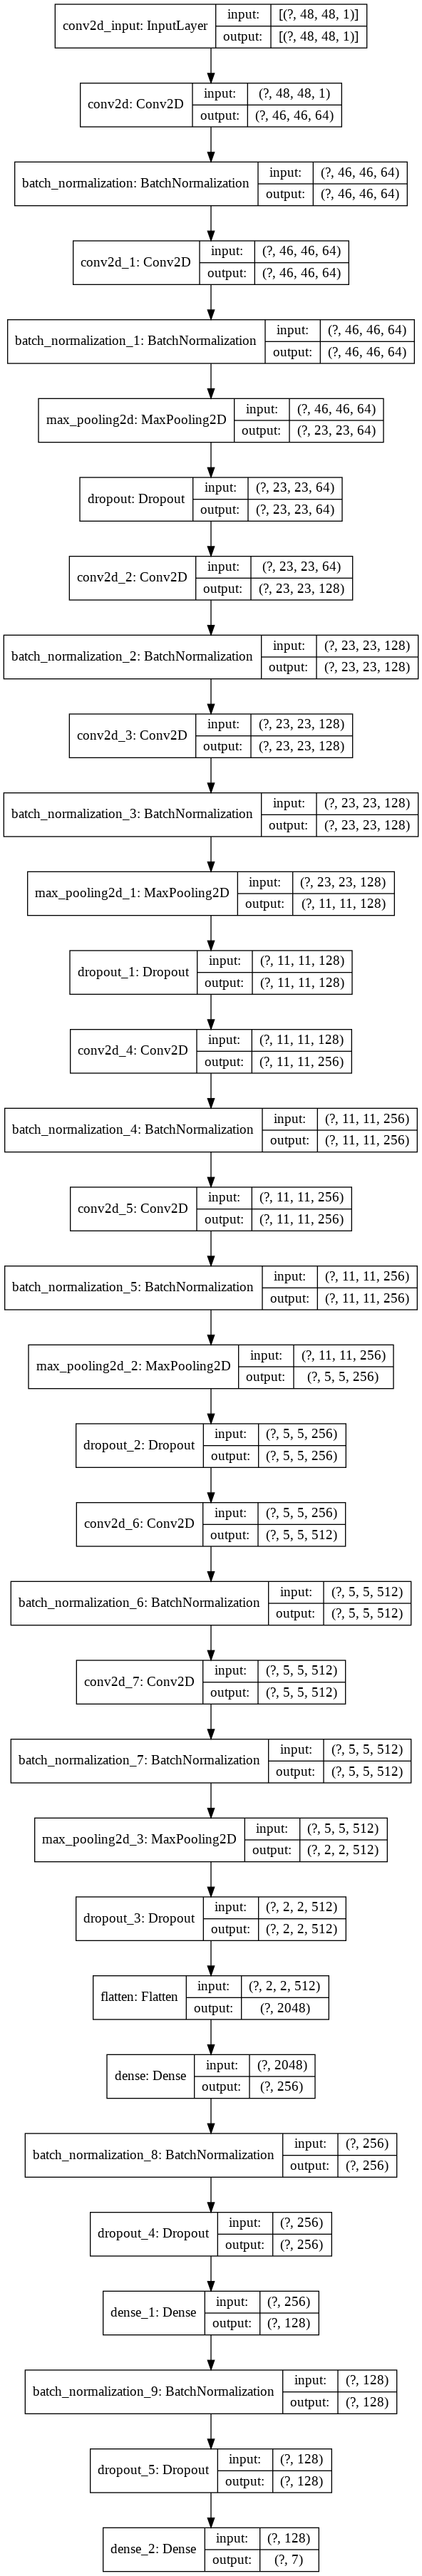

In [20]:
from keras.utils import plot_model
# Save the visualization as a file
plot_model(model, show_shapes=True, to_file='network.png')

In [21]:
# Early Stop when model not improve s
checkpoint_path=f'/content/fer1.h5'
monitor = [
      EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
]

In [22]:
history = model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_valid), np.array(y_valid)),
          callbacks=monitor,
          shuffle=True)

Epoch 1/100
455/455 [==============================] - ETA: 0s - loss: 2.2098 - accuracy: 0.2137
Epoch 00001: val_loss improved from inf to 1.87002, saving model to /content/fer1.h5
455/455 [==============================] - 20s 44ms/step - loss: 2.2098 - accuracy: 0.2137 - val_loss: 1.8700 - val_accuracy: 0.2567
Epoch 2/100
455/455 [==============================] - ETA: 0s - loss: 1.7408 - accuracy: 0.3276
Epoch 00002: val_loss improved from 1.87002 to 1.50839, saving model to /content/fer1.h5
455/455 [==============================] - 19s 43ms/step - loss: 1.7408 - accuracy: 0.3276 - val_loss: 1.5084 - val_accuracy: 0.4272
Epoch 3/100
455/455 [==============================] - ETA: 0s - loss: 1.5089 - accuracy: 0.4185
Epoch 00003: val_loss improved from 1.50839 to 1.39519, saving model to /content/fer1.h5
455/455 [==============================] - 20s 43ms/step - loss: 1.5089 - accuracy: 0.4185 - val_loss: 1.3952 - val_accuracy: 0.4765
Epoch 4/100
455/455 [==========================

In [23]:
from keras.models import load_model

model = load_model(checkpoint_path)
scores = model.evaluate(X_test, y_test, verbose=1)
print(f'Score: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

113/113 [==============================] - 1s 9ms/step - loss: 0.9890 - accuracy: 0.6520
Score: loss of 0.9890271425247192; accuracy of 65.19922018051147%


In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test caccuracy:', test_acc)

113/113 [==============================] - 1s 8ms/step - loss: 0.9890 - accuracy: 0.6520
test caccuracy: 0.6519922018051147


In [25]:
pred_test_labels = model.predict(X_test)

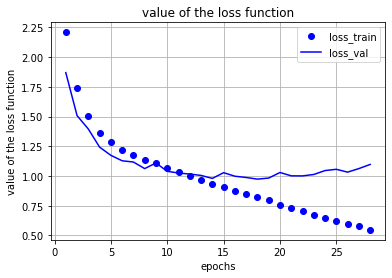

In [26]:
import matplotlib.pyplot as plt
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('value of the loss function')
plt.xlabel('epochs')
plt.ylabel('value of the loss function')
plt.legend()
plt.grid()
plt.show()

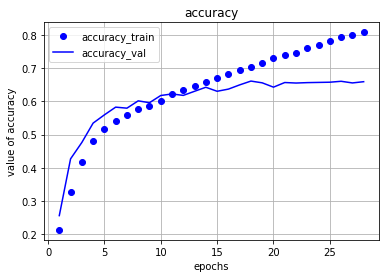

In [27]:
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('value of accuracy')
plt.legend()
plt.grid()
plt.show()

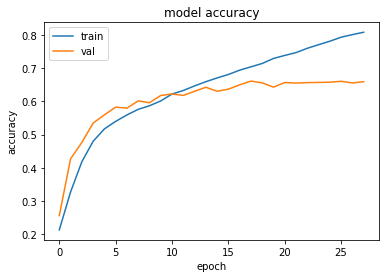

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

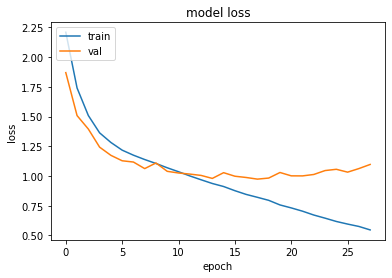

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [56]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
input_img = np.mat(X[i]).reshape(height, width)


# x = x.reshape(-1, 48, 48, 1)

testing_img = np.array(X_test[1], 'float32')
testing_img = testing_img.reshape([-1, 48, 48, 1]);

activations = activation_model.predict(testing_img)
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
        

In [92]:
len(activations)

32

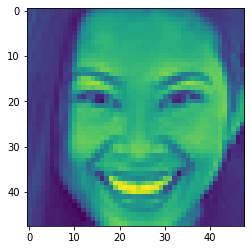

In [76]:
# Input
plt.imshow(X_test[1][:,:,0]);

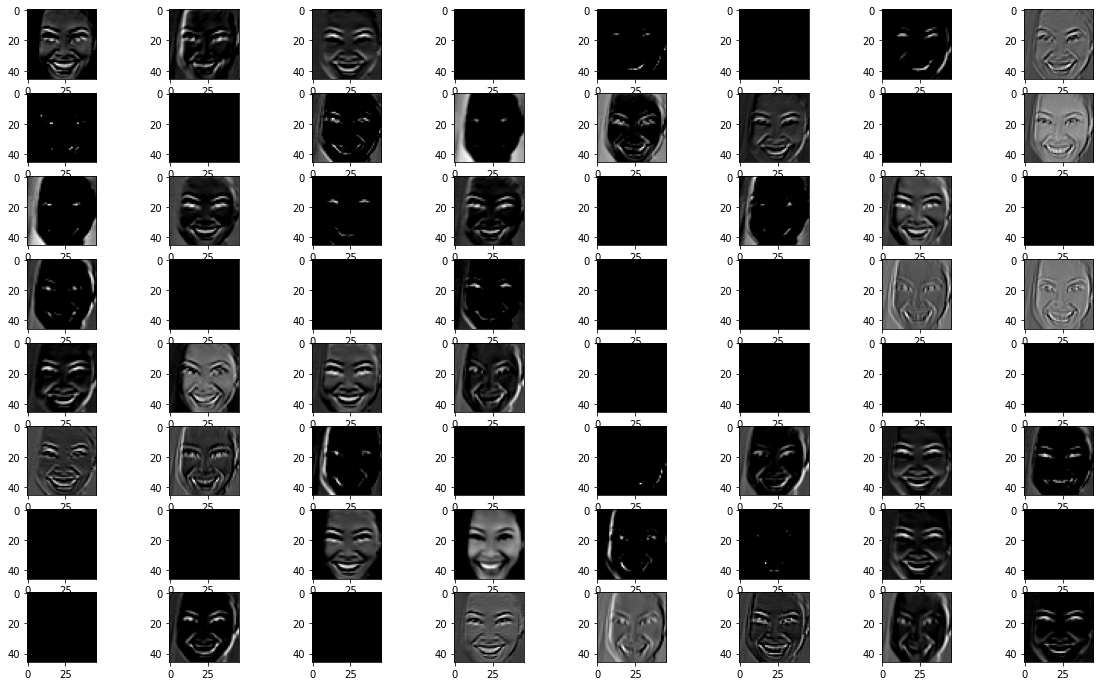

In [96]:
# After layer 2
display_activation(activations, 8, 8, 1)

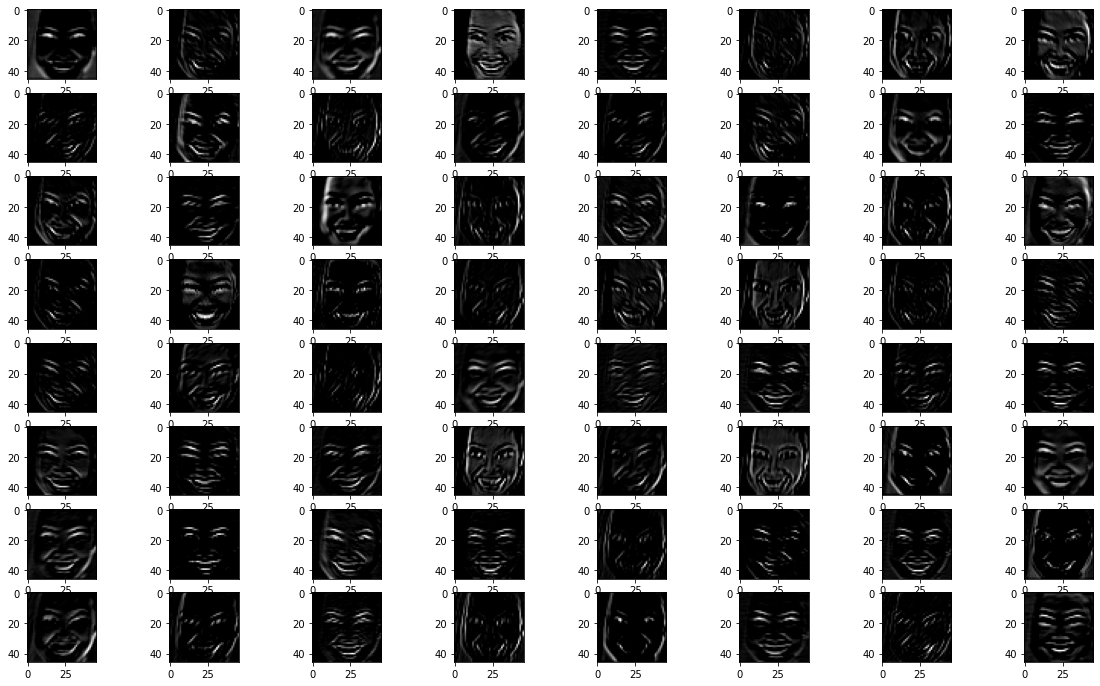

In [68]:
# After Layer 3
display_activation(activations, 8, 8, 2)

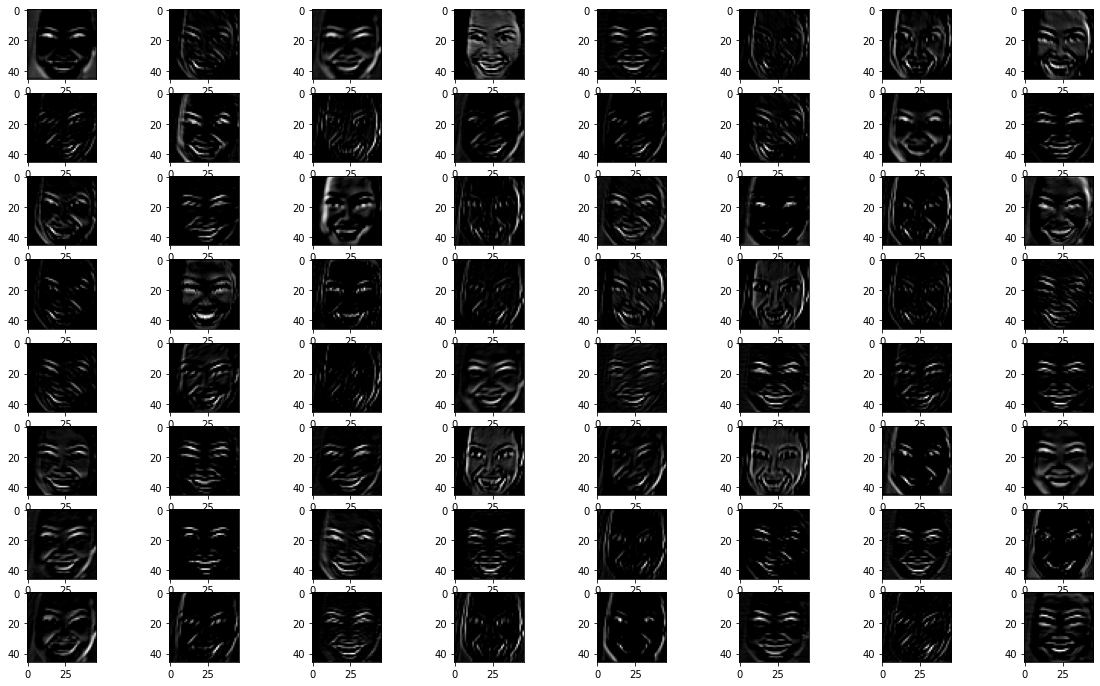

In [60]:
display_activation(activations, 8, 8, 3)
#Displaying output of layer 4

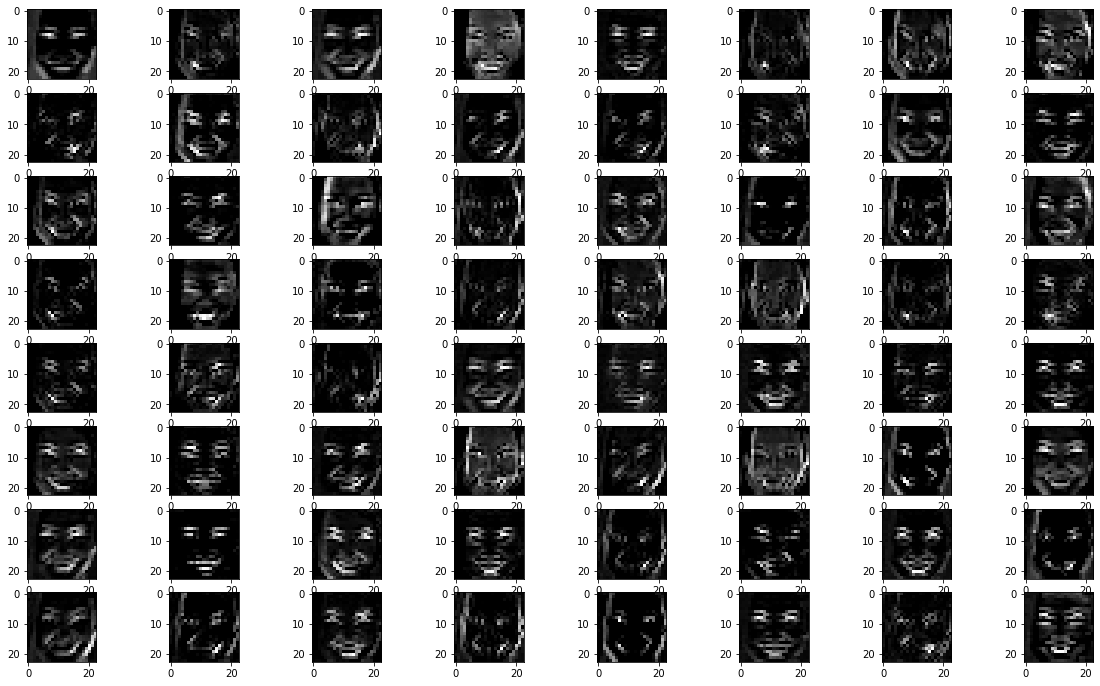

In [69]:
# After Layer 4
display_activation(activations, 8, 8, 4)

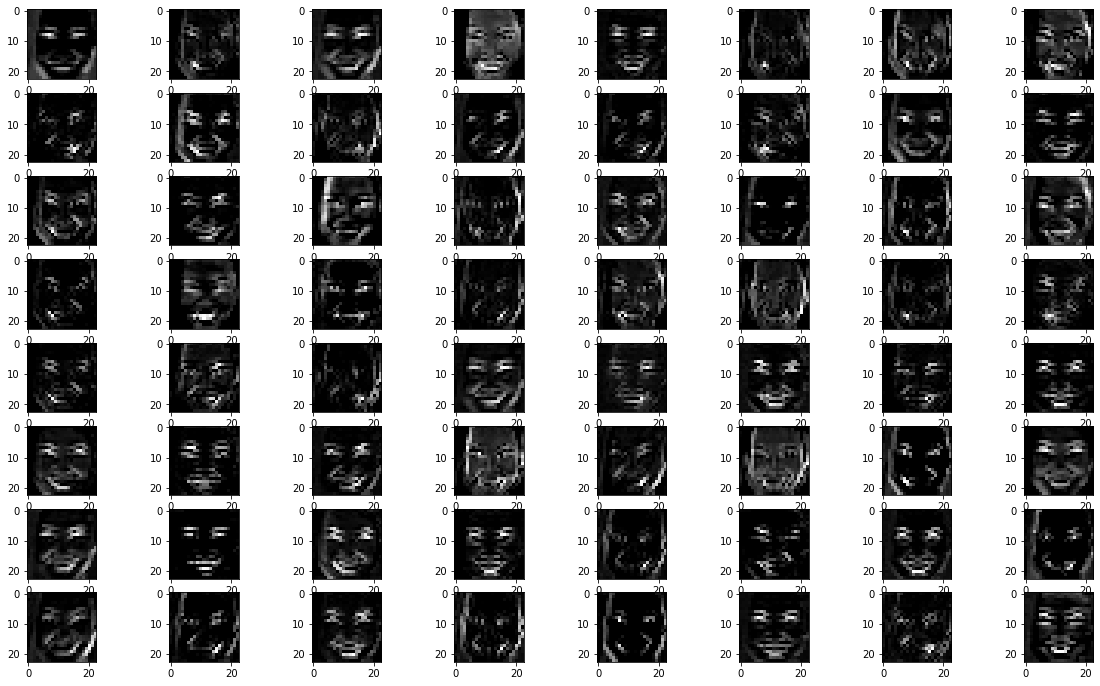

In [70]:
# After Layer 4
display_activation(activations, 8, 8, 5)

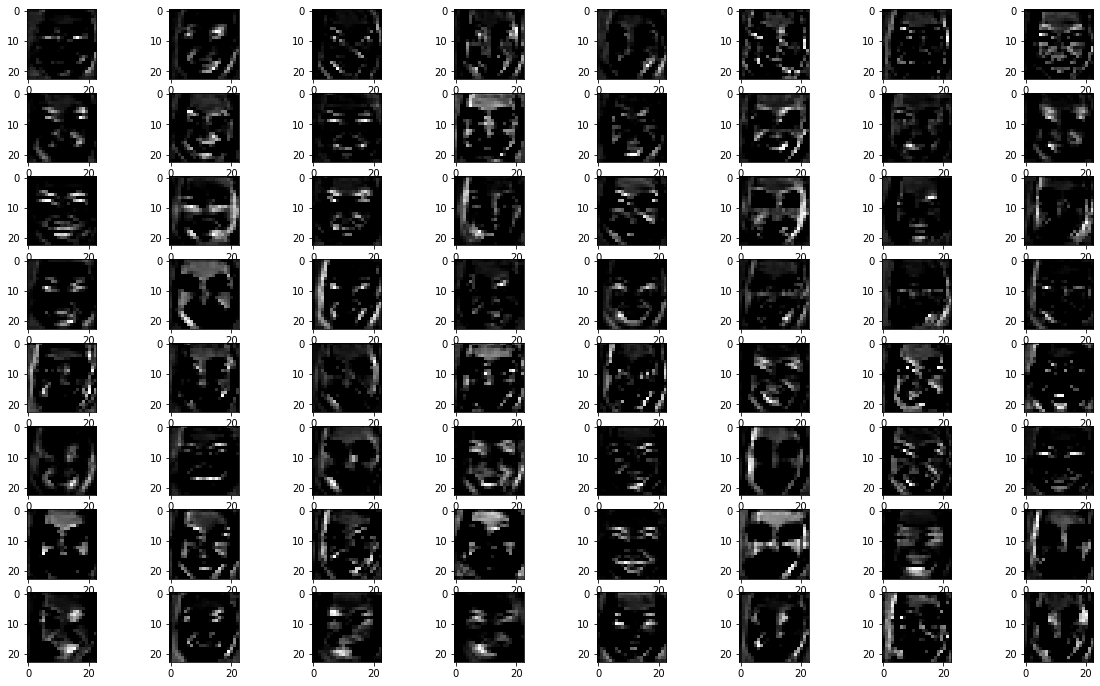

In [71]:
# After Layer 
display_activation(activations, 8, 8, 6)

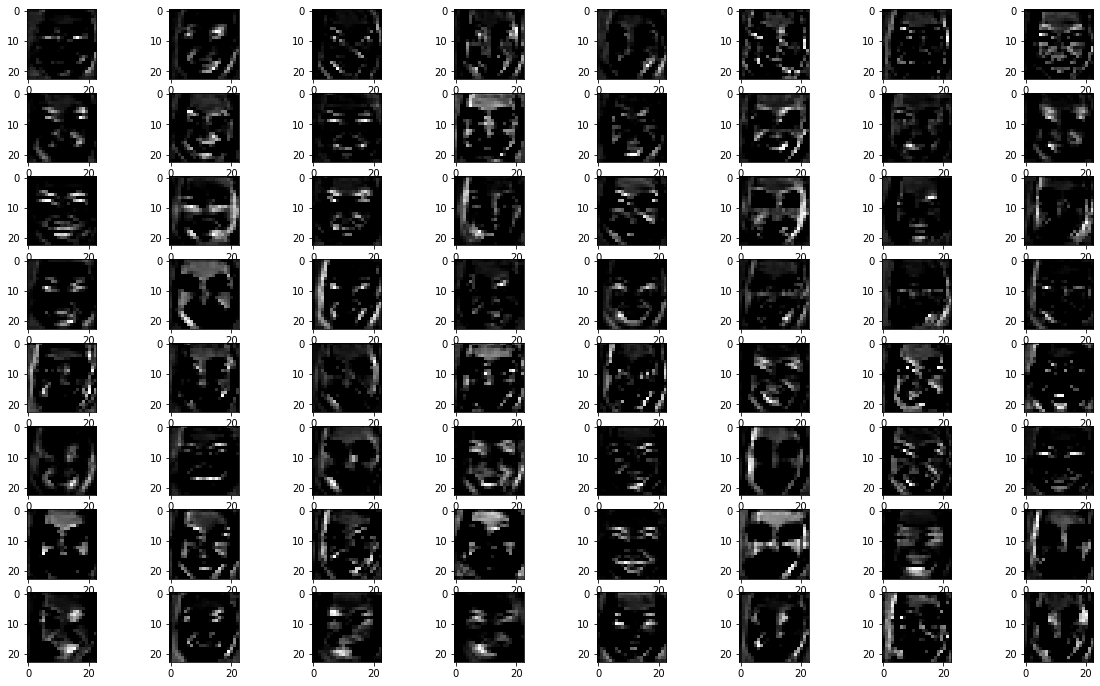

In [61]:
display_activation(activations, 8, 8, 7)
# Displaying output of layer 8

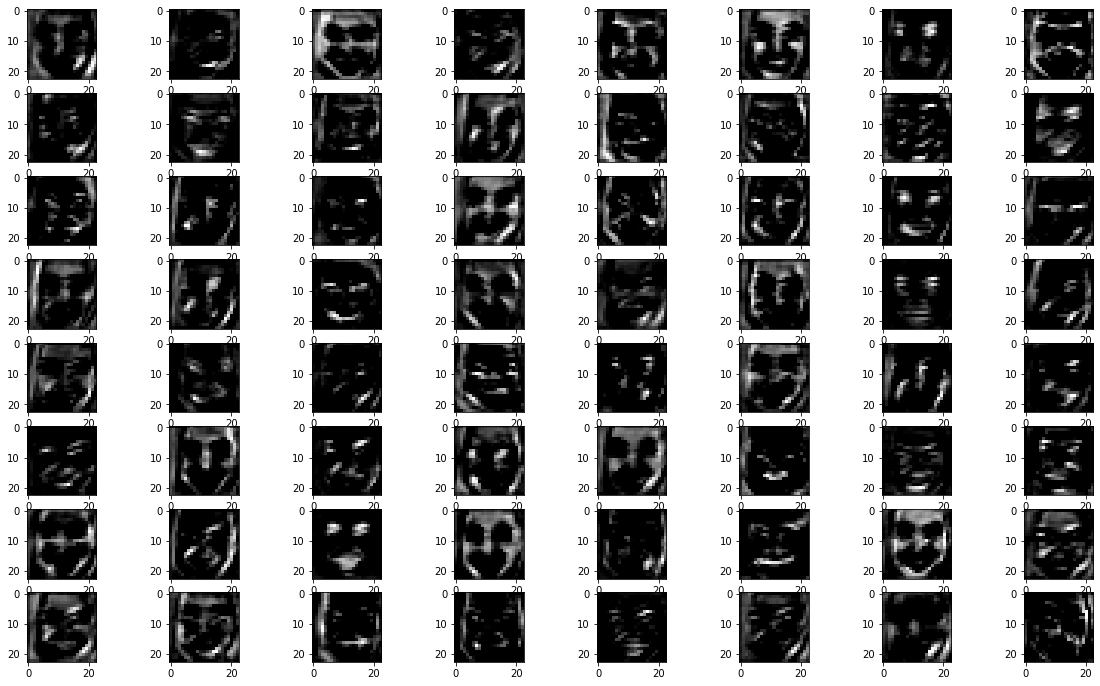

In [72]:
# After Layer 9
display_activation(activations, 8, 8, 8)

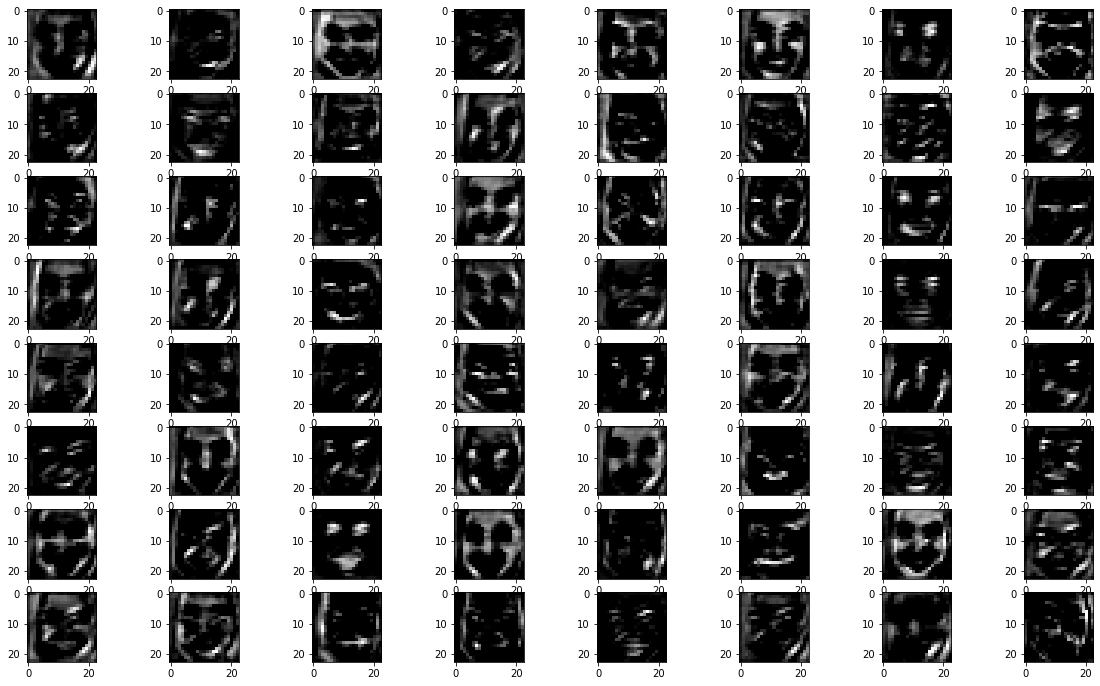

In [98]:
# After Layer 10
display_activation(activations, 8, 8, 9)

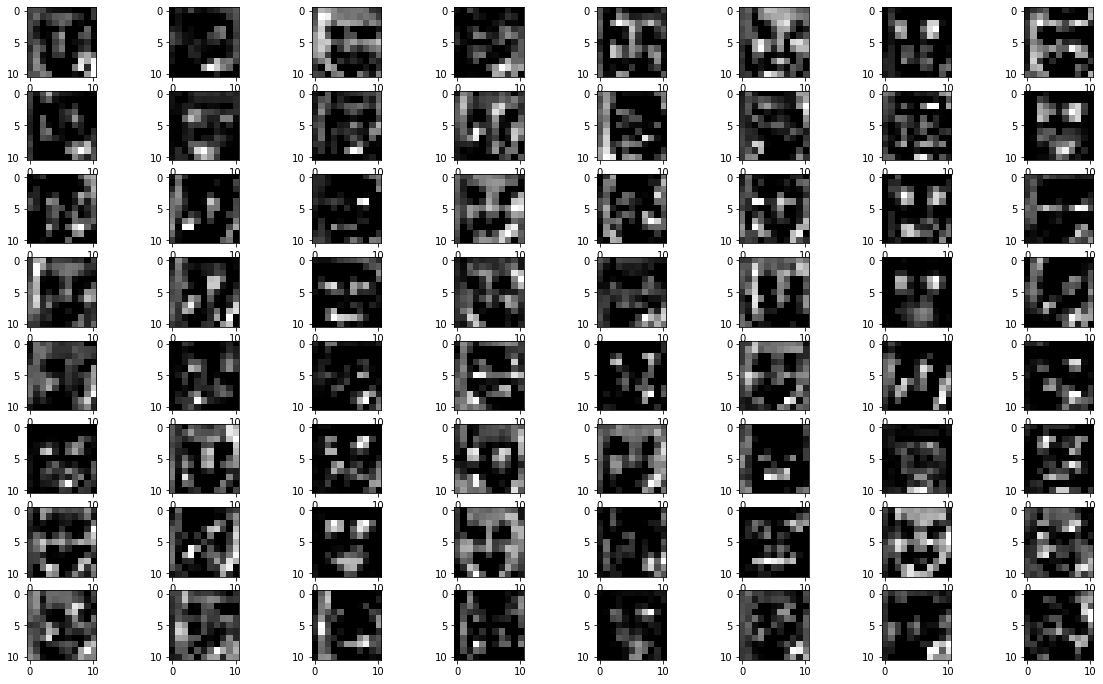

In [78]:
# After Layer 11 diff 
display_activation(activations, 8, 8, 10)

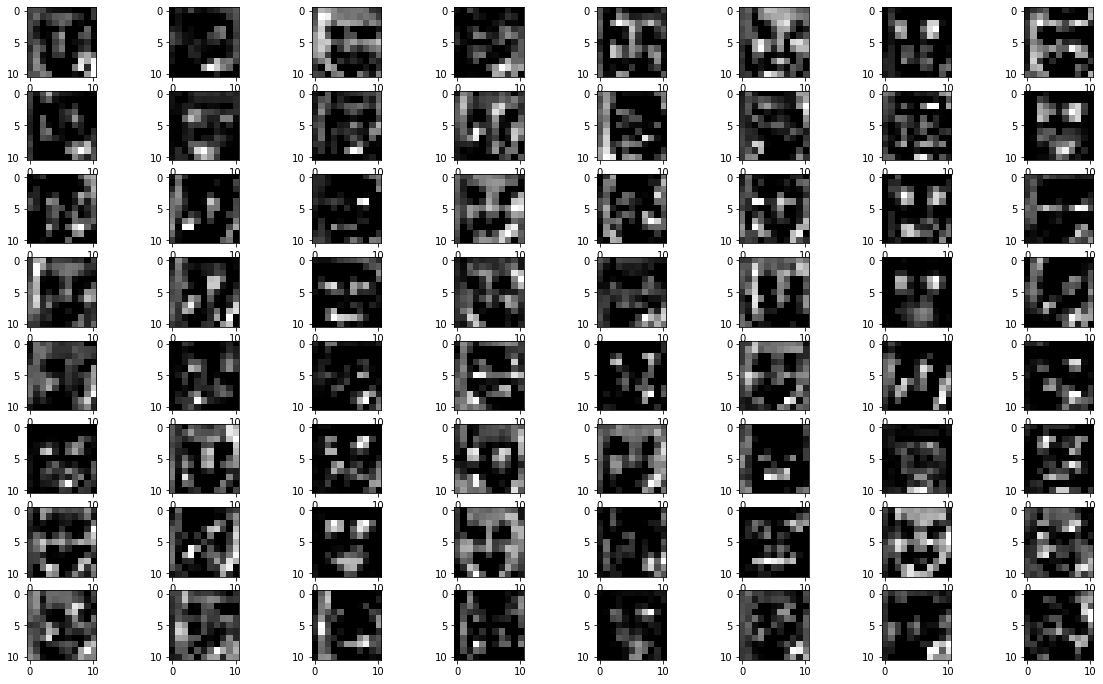

In [79]:
# After Layer 12
display_activation(activations, 8, 8, 11)

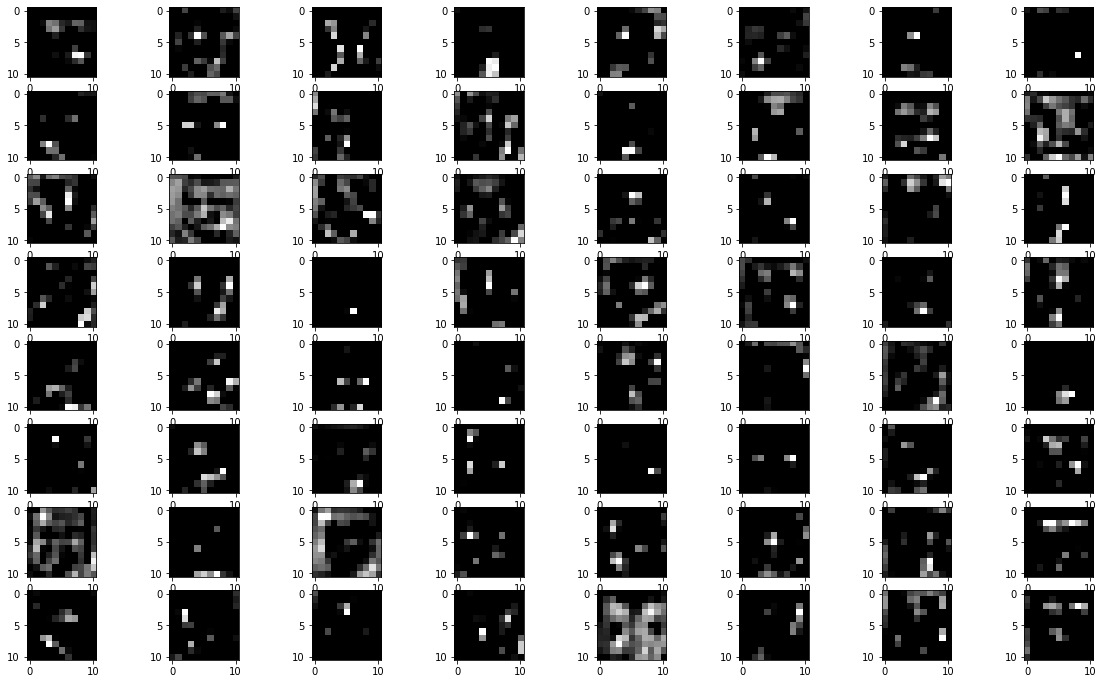

In [80]:
# After Layer 13
display_activation(activations, 8, 8, 12)

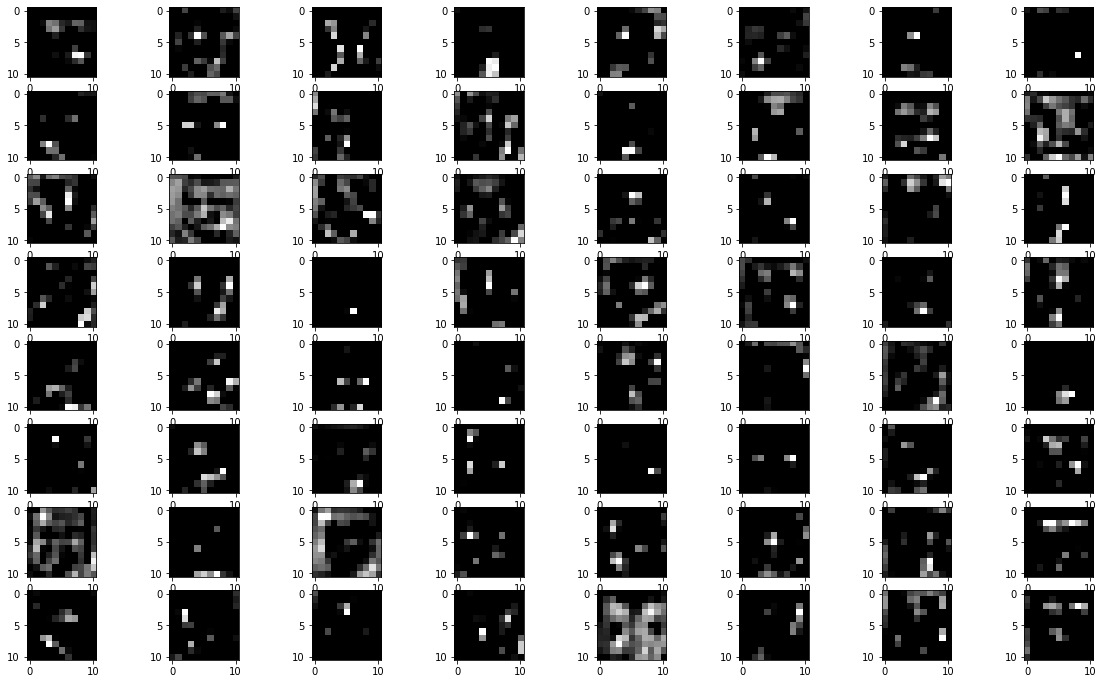

In [81]:
# After Layer 14
display_activation(activations, 8, 8, 13)

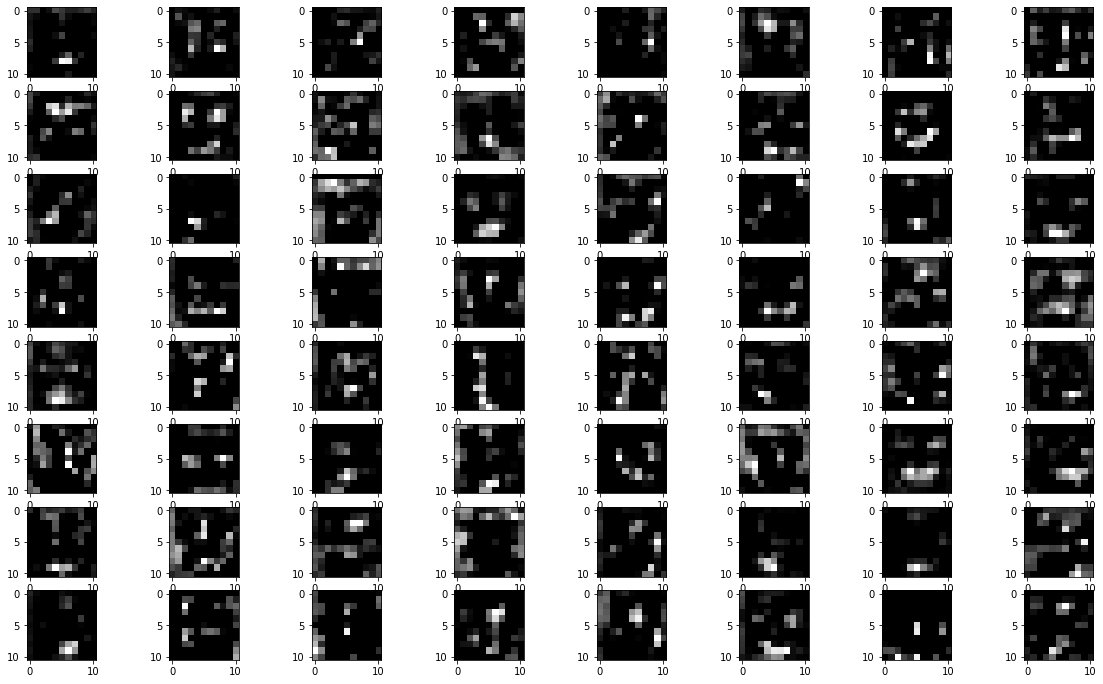

In [82]:
# After Layer 15
display_activation(activations, 8, 8, 14)

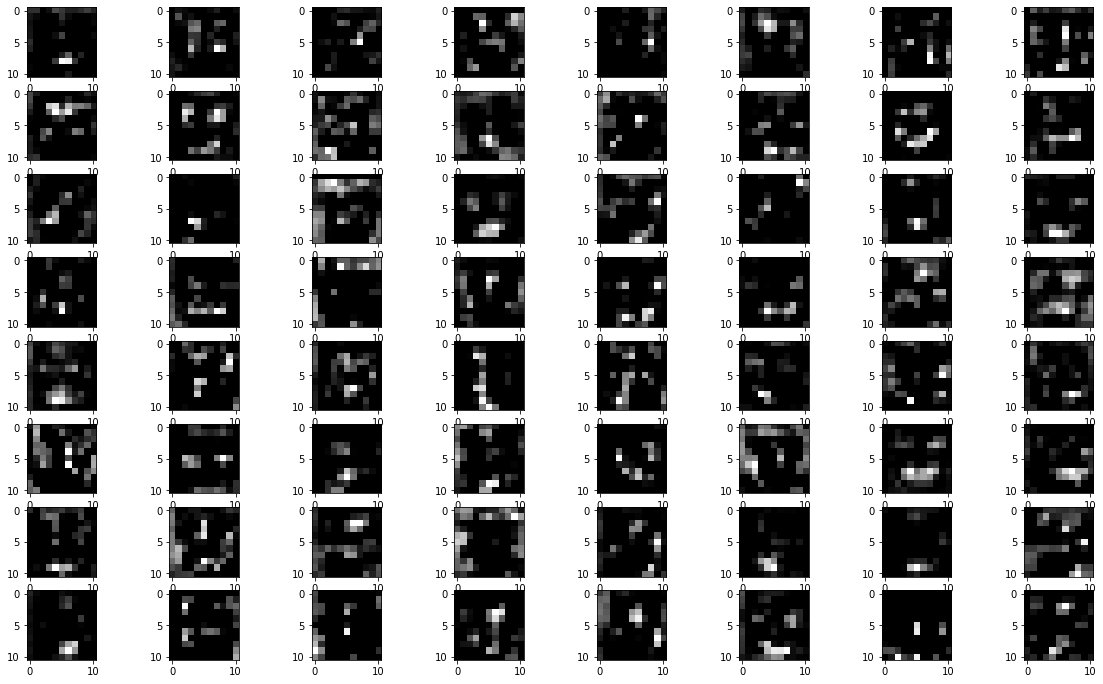

In [83]:
# After Layer 16
display_activation(activations, 8, 8, 15)

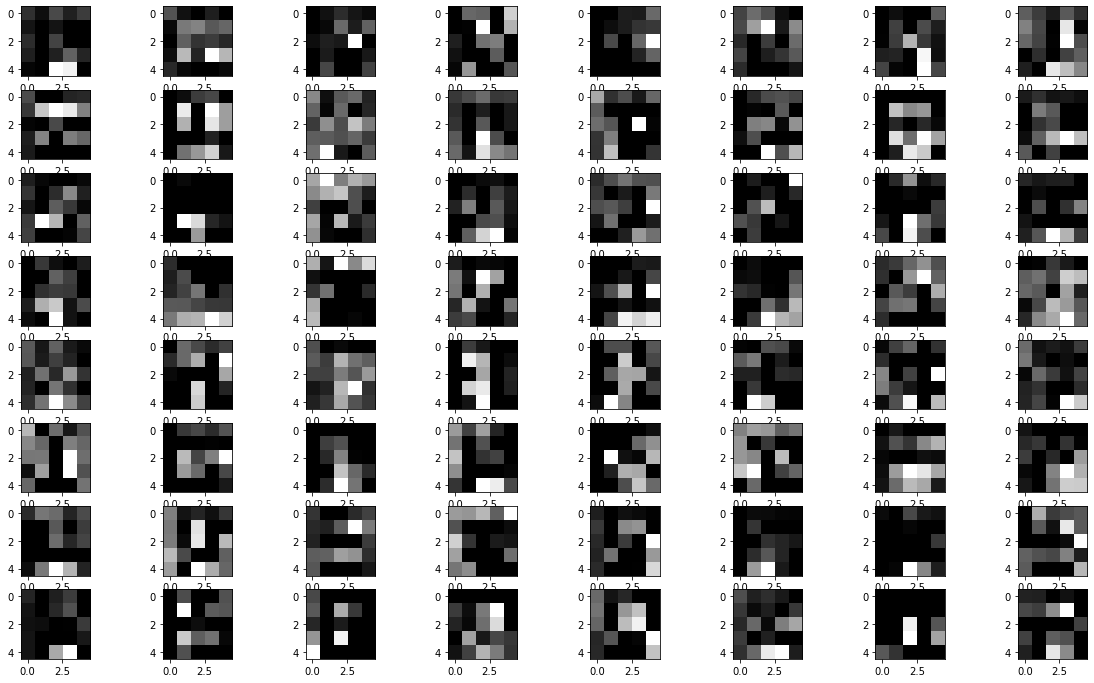

In [84]:
# After Layer 17
display_activation(activations, 8, 8, 16)

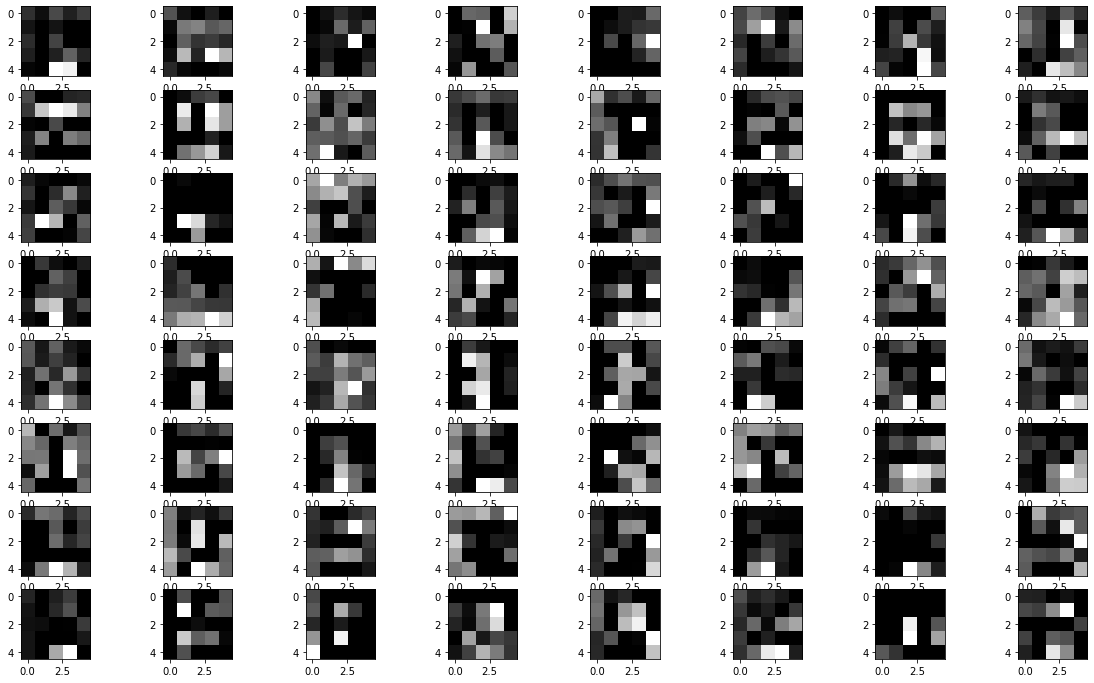

In [85]:
# After Layer 18
display_activation(activations, 8, 8, 17)

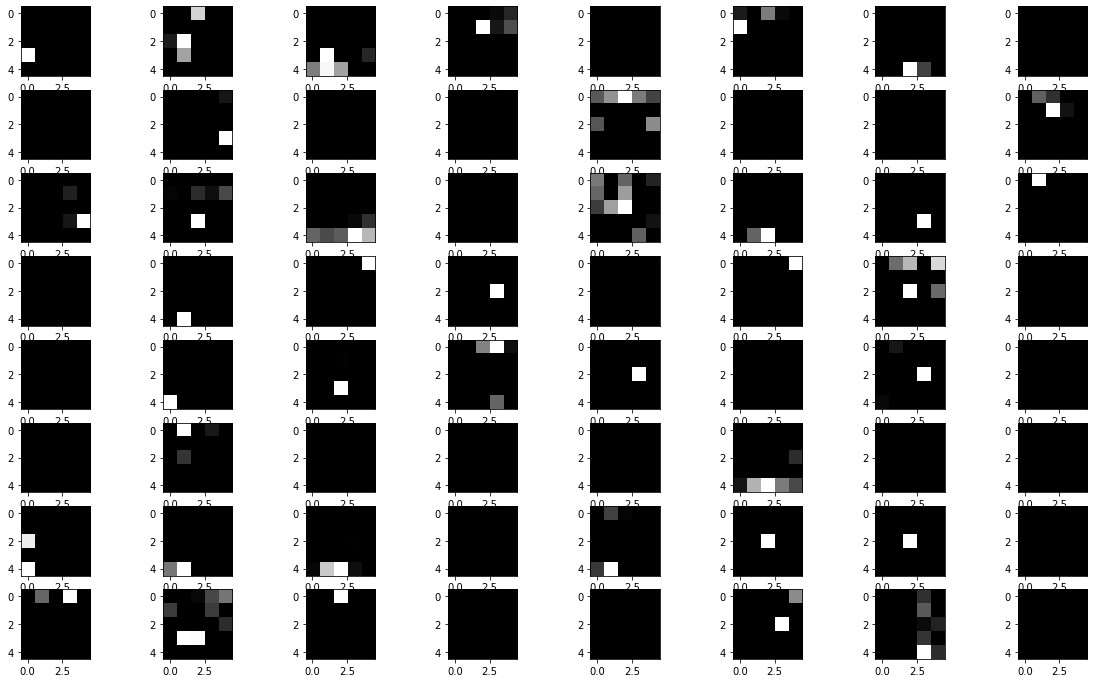

In [87]:
# After Layer 20
display_activation(activations, 8, 8, 19)

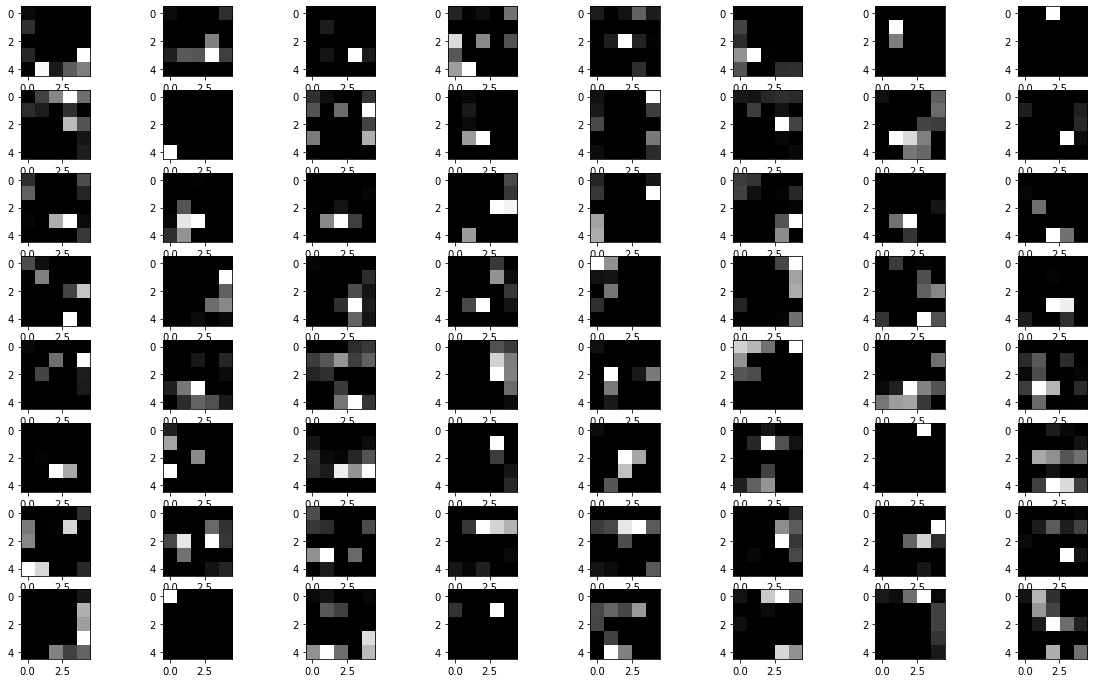

In [88]:
# After Layer 21
display_activation(activations, 8, 8, 20)

In [63]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(X_valid)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_valid,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

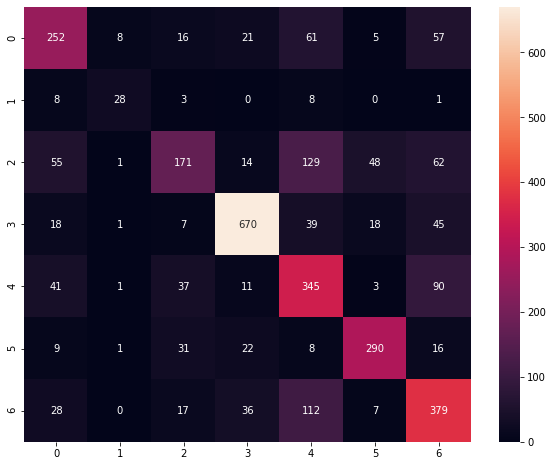

In [67]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");